<a href="https://colab.research.google.com/github/antoniarioseco1-rgb/portafolio/blob/etapa-1/Etapa_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predicción del Nivel de PIB utilizando Datos del Banco Mundial**

El objetivo de este proyecto es predecir el nivel de PIB de distintos países a partir de indicadores económicos, sociales y demográficos obtenidos del Banco Mundial.

El trabajo debe realizarse en tres etapas principales:

- Etapa 1: Análisis descriptivo e imputación de datos

- Etapa 2: Reducción de dimensionalidad con PCA

- Etapa 3: Modelación mediante algoritmos de clasificación

### **Etapa Previa**:

En github debe crear un repositorio llamado portfolios. Además debe crear tres ramas para cada una de las etapas. Recuerde que la rama  `main` debe contener todas las actualizaciones de su código por medio de una unión entre las ramas de las etapas junto con la rama principal.


En esta etapa inicial, se deberá configurar correctamente la estructura del proyecto utilizando GitHub como sistema de control de versiones.
- Crear un repositorio en GitHub con el nombre `portafolio`
- En el archivo `README.md` debe describir claramente la finalidad del proyecto. Puede apoyarse en las indicaciones descritas acá como referencia inicial; sin embargo, el contenido debe ser reformulado y contextualizado, de modo que el repositorio refleje un proyecto original, coherente y concebido por usted, tanto en su propósito como en su enfoque.
- A partir de la rama main, crear tres ramas, cada una asociada a una etapa del trabajo (por ejemplo: `etapa-1`, `etapa-2`, `etapa-3`). Cada rama deberá contener exclusivamente los avances correspondientes a su respectiva etapa.
- Realizar la extracción inicial de los datos desde la fuente del Banco Mundial y subir estos datos al repositorio en una carpeta denominada `main`.

**Indicaciones**
- Una vez finalizada cada etapa, los cambios desarrollados en la rama correspondiente deberán integrarse a la rama `main` mediante un proceso de unión (`merge`).
- La rama `main` debe reflejar, en todo momento, la versión más actualizada y consolidada del proyecto.


In [18]:
#Instalación de librerias

!pip -q install wbgapi scikit-learn

import numpy as np
import pandas as pd

import wbgapi as wb

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
indicadores = [
    "NY.GDP.PCAP.CD",    #PIB per cap
    "SP.POP.TOTL",       #Total de población
    "SP.DYN.LE00.IN",     #Expectativa de vida
    "SE.XPD.TOTL.GD.ZS",   #Gasto público en educación
    "SH.XPD.CHEX.GD.ZS",   #Gasto en salud (% del PIB)
    "NE.TRD.GNFS.ZS",      #Comercio (% del PIB)
    "NV.AGR.TOTL.ZS",      #Agricultura
    "NV.IND.TOTL.ZS",      #Industria
    "NV.SRV.TOTL.ZS",      #Servicios
    "SP.URB.TOTL.IN.ZS",   #Población urbanaa
    "EG.USE.PCAP.KG.OE",   #Uso de energía
    "EN.ATM.CO2E.PC",      #Emisión de CO2
]

In [20]:
#Datos

year = 2023

datos = wb.data.DataFrame(indicadores, time=year, labels=True).reset_index()
datos.head()

,economy,Country,EG.USE.PCAP.KG.OE,NE.TRD.GNFS.ZS,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NY.GDP.PCAP.CD,SE.XPD.TOTL.GD.ZS,SH.XPD.CHEX.GD.ZS,SP.DYN.LE00.IN,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,ZWE,Zimbabwe,NaN,40.291261,11.494869,33.255552,49.563454,2195.224921,0.384771,NaN,62.775000,16340822.0,39.291937
1,ZMB,Zambia,NaN,78.241887,2.230120,35.107778,56.816764,1330.727806,4.073749,NaN,66.349000,20723965.0,45.028585
2,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.295000,39390799.0,36.570798
3,PSE,West Bank and Gaza,NaN,79.533166,5.703752,15.580544,58.534618,3455.028529,NaN,NaN,65.170000,5165775.0,86.857687
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.519512,104917.0,95.274079


In [21]:
print(datos.columns)

Index(['economy', 'Country', 'EG.USE.PCAP.KG.OE', 'NE.TRD.GNFS.ZS',
       'NV.AGR.TOTL.ZS', 'NV.IND.TOTL.ZS', 'NV.SRV.TOTL.ZS', 'NY.GDP.PCAP.CD',
       'SE.XPD.TOTL.GD.ZS', 'SH.XPD.CHEX.GD.ZS', 'SP.DYN.LE00.IN',
       'SP.POP.TOTL', 'SP.URB.TOTL.IN.ZS'],
      dtype='object')


### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de aceurdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

In [22]:
datos.head()

,economy,Country,EG.USE.PCAP.KG.OE,NE.TRD.GNFS.ZS,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NY.GDP.PCAP.CD,SE.XPD.TOTL.GD.ZS,SH.XPD.CHEX.GD.ZS,SP.DYN.LE00.IN,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,ZWE,Zimbabwe,NaN,40.291261,11.494869,33.255552,49.563454,2195.224921,0.384771,NaN,62.775000,16340822.0,39.291937
1,ZMB,Zambia,NaN,78.241887,2.230120,35.107778,56.816764,1330.727806,4.073749,NaN,66.349000,20723965.0,45.028585
2,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.295000,39390799.0,36.570798
3,PSE,West Bank and Gaza,NaN,79.533166,5.703752,15.580544,58.534618,3455.028529,NaN,NaN,65.170000,5165775.0,86.857687
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.519512,104917.0,95.274079


* Revisión básica del dataset con el fin de mirar y revisar su estructura básica - *identificando elementos como países, años, las variables disponibles, etc* - además de elementos como el total de observaciones, para dimensionar de mejor forma el análisis y limitaciones de datos.

In [23]:
estadisticas = datos.describe().T
estadisticas[['mean', '50%', 'std', 'min', 'max']]

,mean,50%,std,min,max
EG.USE.PCAP.KG.OE,2.625160e+03,2.293708e+03,1.974140e+03,291.050601,1.568570e+04
NE.TRD.GNFS.ZS,8.917793e+01,7.359092e+01,5.691845e+01,2.473729,4.025670e+02
NV.AGR.TOTL.ZS,1.005421e+01,6.979635e+00,9.387214e+00,0.015093,3.850929e+01
NV.IND.TOTL.ZS,2.629341e+01,2.533140e+01,1.136528e+01,2.086302,7.889953e+01
NV.SRV.TOTL.ZS,5.638622e+01,5.634447e+01,1.202208e+01,18.767186,9.145617e+01
NY.GDP.PCAP.CD,2.009550e+04,7.672613e+03,3.087982e+04,250.627253,2.567998e+05
SE.XPD.TOTL.GD.ZS,3.817455e+00,3.514816e+00,1.955497e+00,0.000008,1.639053e+01
SH.XPD.CHEX.GD.ZS,8.631555e+00,8.991660e+00,2.190005e+00,3.579288,1.179903e+01
SP.DYN.LE00.IN,7.345860e+01,7.384400e+01,6.960836e+00,54.462000,8.637200e+01
SP.POP.TOTL,3.283978e+08,1.064485e+07,1.012445e+09,9816.000000,8.064058e+09


* Estadisticas descriptivas "básicas" tales como media, mediana, desviación estándar, etc. Lo cual permite tener una primera aproximación al rango, dispersión, magnitud de las variables analizadas


In [24]:
#Dejamos el país como indice
pais = "Economy" if "Economy" in datos.columns else "economy"

# Filtrar los indicadores que realmente se encuentran en el DataFrame 'datos'
n_indicadores = [col for col in indicadores if col in datos.columns]

df = datos.set_index(pais)[n_indicadores].copy()
df.head()

,NY.GDP.PCAP.CD,SP.POP.TOTL,SP.DYN.LE00.IN,SE.XPD.TOTL.GD.ZS,SH.XPD.CHEX.GD.ZS,NE.TRD.GNFS.ZS,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,SP.URB.TOTL.IN.ZS,EG.USE.PCAP.KG.OE
economy,,,,,,,,,,,
ZWE,2195.224921,16340822.0,62.775000,0.384771,NaN,40.291261,11.494869,33.255552,49.563454,39.291937,NaN
ZMB,1330.727806,20723965.0,66.349000,4.073749,NaN,78.241887,2.230120,35.107778,56.816764,45.028585,NaN
YEM,NaN,39390799.0,69.295000,NaN,NaN,NaN,NaN,NaN,NaN,36.570798,NaN
PSE,3455.028529,5165775.0,65.170000,NaN,NaN,79.533166,5.703752,15.580544,58.534618,86.857687,NaN
VIR,NaN,104917.0,80.519512,NaN,NaN,NaN,NaN,NaN,NaN,95.274079,NaN


In [25]:
na  = datos.isna().mean() * 100
na_2 = na.sort_values(ascending=False).to_frame(name='NA (%)')
na_2

,NA (%)
SH.XPD.CHEX.GD.ZS,92.105263
EG.USE.PCAP.KG.OE,65.789474
SE.XPD.TOTL.GD.ZS,41.353383
NE.TRD.GNFS.ZS,19.172932
NV.SRV.TOTL.ZS,11.654135
NV.AGR.TOTL.ZS,11.278195
NV.IND.TOTL.ZS,11.278195
NY.GDP.PCAP.CD,5.263158
SP.DYN.LE00.IN,0.375940
SP.POP.TOTL,0.375940


In [26]:
# Variables con menos de 15% de NA (se imputan)
imputada = na[na < 15].index.tolist()

# Variables con 15% o más de NA (se eliminan)
eliminada = na[na >= 15].index.tolist()

imputada , eliminada

(['economy',
  'Country',
  'NV.AGR.TOTL.ZS',
  'NV.IND.TOTL.ZS',
  'NV.SRV.TOTL.ZS',
  'NY.GDP.PCAP.CD',
  'SP.DYN.LE00.IN',
  'SP.POP.TOTL',
  'SP.URB.TOTL.IN.ZS'],
 ['EG.USE.PCAP.KG.OE',
  'NE.TRD.GNFS.ZS',
  'SE.XPD.TOTL.GD.ZS',
  'SH.XPD.CHEX.GD.ZS'])

In [27]:
# Eliminamos variables con muchos NA
datos1 = datos.drop(columns=eliminada)

datos1.head()

,economy,Country,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NY.GDP.PCAP.CD,SP.DYN.LE00.IN,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,ZWE,Zimbabwe,11.494869,33.255552,49.563454,2195.224921,62.775000,16340822.0,39.291937
1,ZMB,Zambia,2.230120,35.107778,56.816764,1330.727806,66.349000,20723965.0,45.028585
2,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,69.295000,39390799.0,36.570798
3,PSE,West Bank and Gaza,5.703752,15.580544,58.534618,3455.028529,65.170000,5165775.0,86.857687
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,80.519512,104917.0,95.274079


In [28]:
#Imputación de datos
num = [col for col in imputada if col in datos1.select_dtypes(include=np.number).columns]

imputados = SimpleImputer(strategy = "mean")
datos1[num] = imputados.fit_transform(datos1[num])

datos1.head()

,economy,Country,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NY.GDP.PCAP.CD,SP.DYN.LE00.IN,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
0,ZWE,Zimbabwe,11.494869,33.255552,49.563454,2195.224921,62.775000,16340822.0,39.291937
1,ZMB,Zambia,2.230120,35.107778,56.816764,1330.727806,66.349000,20723965.0,45.028585
2,YEM,"Yemen, Rep.",10.054214,26.293406,56.386215,20095.500023,69.295000,39390799.0,36.570798
3,PSE,West Bank and Gaza,5.703752,15.580544,58.534618,3455.028529,65.170000,5165775.0,86.857687
4,VIR,Virgin Islands (U.S.),10.054214,26.293406,56.386215,20095.500023,80.519512,104917.0,95.274079


* Se calcula el porcentaje de los datos nulos por variable. Las variables con menos de un 15% de valores nulos se mantienen para una imputación, mientras que las que tienen un porcentaje mayor, se eliminan para evitar sesgos.

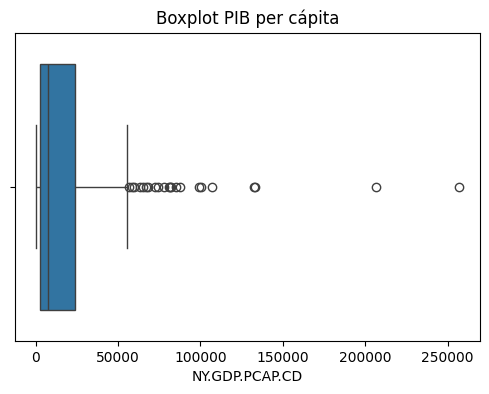

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x=datos['NY.GDP.PCAP.CD'])
plt.title("Boxplot PIB per cápita")
plt.show()

* Boxplot para identificar valores atípicos.

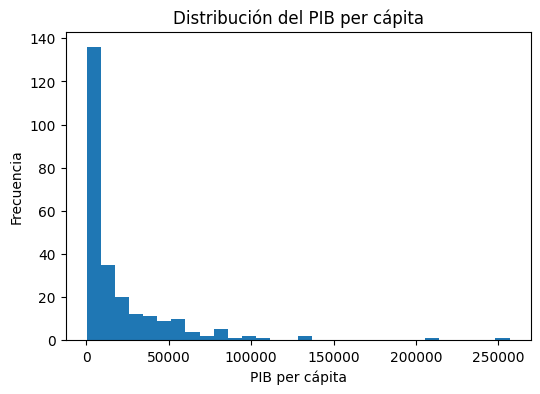

In [30]:
plt.figure(figsize=(6,4))
plt.hist(datos['NY.GDP.PCAP.CD'].dropna(), bins=30)
plt.title("Distribución del PIB per cápita")
plt.xlabel("PIB per cápita")
plt.ylabel("Frecuencia")
plt.show()

* Distribución asimetrica del PIB

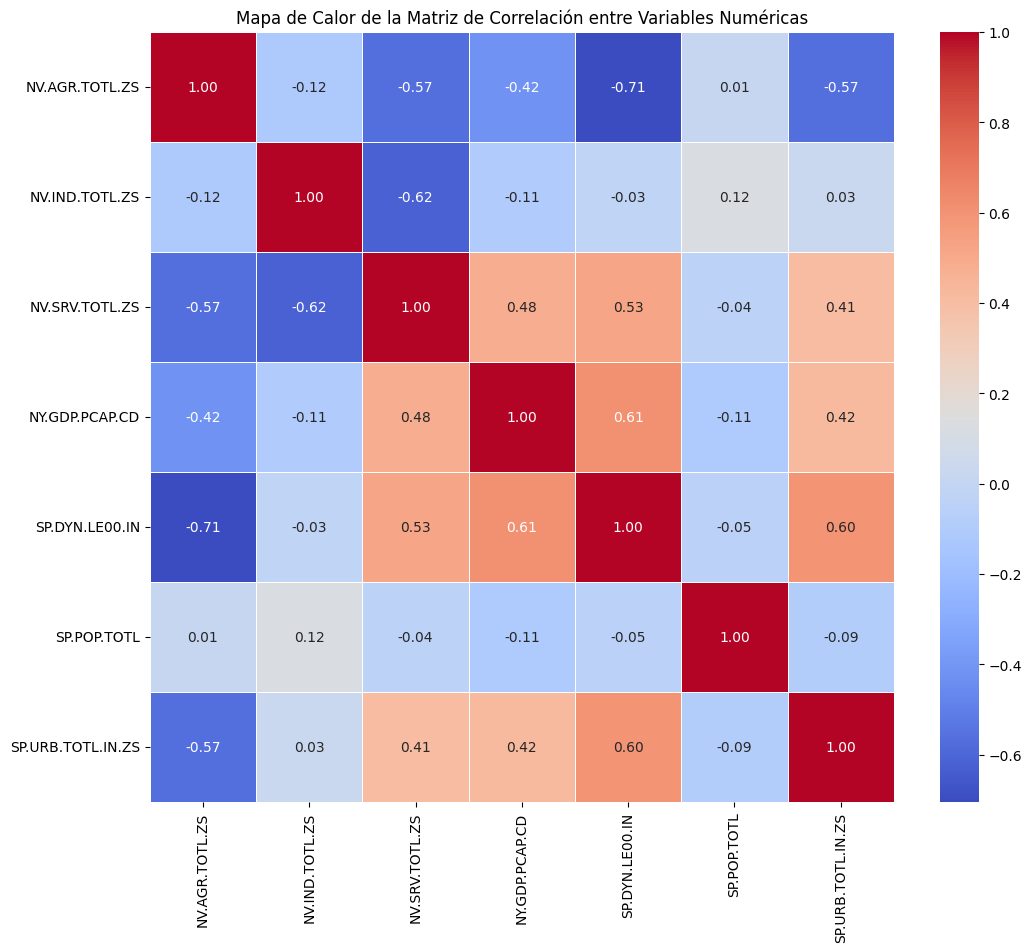

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas del DataFrame 'datos1'
# También eliminamos 'NY.GDP.PCAP.CD_discretizada' si ya está presente ya que es categórica
# y 'NY.GDP.PCAP.CD' para que no esté duplicada con la discretizada
numerical_cols = datos1.select_dtypes(include=['number']).columns

# Excluir la variable objetivo si ya está discretizada y no queremos su correlación con las numéricas
# o si la original ya está presente y no queremos su correlación directa
# Si 'NY.GDP.PCAP.CD_discretizada' no está en datos1, no pasa nada
if 'NY.GDP.PCAP.CD_discretizada' in numerical_cols:
    numerical_cols = numerical_cols.drop('NY.GDP.PCAP.CD_discretizada')

# Calcular la matriz de correlación. Se eliminan las filas con NaN para este cálculo.
corr_matrix = datos1[numerical_cols].dropna().corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True, # Muestra los valores de correlación en el mapa de calor
            cmap='coolwarm', # Esquema de color para la visualización
            fmt=".2f", # Formato de los números en las anotaciones
            linewidths=.5) # Líneas entre las celdas
plt.title('Mapa de Calor de la Matriz de Correlación entre Variables Numéricas')
plt.show()

* El mapa de calor nos ayuda a observar mediante colores las diferencias regionales en el nivel del PIB.

Evidenciando la concentración de mayores niveles de ingreso en ciertas regiones del mundo.

In [32]:
datos['NY.GDP.PCAP.CD_discretizada'] = pd.qcut(
    datos['NY.GDP.PCAP.CD'],
    q=5,
    labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']
)

In [33]:
datos['NY.GDP.PCAP.CD_discretizada'].value_counts()

,count
NY.GDP.PCAP.CD_discretizada,
Low,51
High,51
Medium-Low,50
Medium,50
Medium-High,50
